In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/onyxia/work/Projet-de-Statapp---WFP-/SPI.csv", sep=";")
data = pd.read_csv("/home/onyxia/work/Projet-de-Statapp---WFP-/NIGERIA_WFP_ENGINEERED.csv")

In [3]:
df.head()

,Unnamed: 0,State,month,SPI_Cum1,SPI_Cum3,SPI_Cum6,year
0,1,Abia,1,-0.691,-0.551,-1.967,2023
1,2,Abia,2,-1.834,-1.219,-1.982,2023
2,3,Abia,3,0.749,-0.174,-0.374,2023
3,4,Abia,4,-0.051,-0.019,-0.394,2023
4,5,Abia,5,-0.295,0.020,-0.389,2023


In [18]:
data.head()

,time,NAME_1,inadequate,bnds,Y,X,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,Psurf_f_tavg,...,vim_lag1,vim_lag3,vim_lag6,viq_roll3m_mean,viq_roll6m_mean,viq_lag1,viq_lag3,viq_lag6,target_plus_1m,target_plus_3m
0,2023-01-01,Abia,0.296774,0.5,5.395,7.471889,0.000016,385.566324,-71.064699,99941.271400,...,0.569790,0.569790,0.56979,101.348943,101.662204,101.51092,101.51092,101.51092,0.401515,0.300613
1,2023-02-01,Abia,0.401515,0.5,5.395,7.471889,0.000014,392.934595,-69.757725,99864.297600,...,0.569790,0.569790,0.56979,101.348943,101.662204,101.51092,101.51092,101.51092,0.281046,0.226667
2,2023-03-01,Abia,0.281046,0.5,5.395,7.471889,0.000026,408.719824,-44.999965,99913.329933,...,0.598635,0.569790,0.56979,101.348943,101.662204,100.31283,101.51092,101.51092,0.300613,0.263514
3,2023-04-01,Abia,0.300613,0.5,5.395,7.471889,0.000030,416.609924,-39.776577,99798.052400,...,0.683211,0.569790,0.56979,101.348943,101.662204,102.22308,101.51092,101.51092,0.226667,0.412903
4,2023-05-01,Abia,0.226667,0.5,5.395,7.471889,0.000039,419.145751,-35.249339,99990.250067,...,0.751135,0.598635,0.56979,101.623837,101.662204,102.33560,100.31283,101.51092,0.263514,0.335443


In [4]:
data["time"] = pd.to_datetime(data["time"])
data["Year"]=data["time"].dt.year

In [30]:
data.head()

,time,NAME_1,inadequate,bnds,Y,X,Evap_tavg,LWdown_f_tavg,Lwnet_tavg,Psurf_f_tavg,...,vim_lag3,vim_lag6,viq_roll3m_mean,viq_roll6m_mean,viq_lag1,viq_lag3,viq_lag6,target_plus_1m,target_plus_3m,Year
0,2023-01-01,Abia,0.296774,0.5,5.395,7.471889,0.000016,385.566324,-71.064699,99941.271400,...,0.569790,0.56979,101.348943,101.662204,101.51092,101.51092,101.51092,0.401515,0.300613,2023
1,2023-02-01,Abia,0.401515,0.5,5.395,7.471889,0.000014,392.934595,-69.757725,99864.297600,...,0.569790,0.56979,101.348943,101.662204,101.51092,101.51092,101.51092,0.281046,0.226667,2023
2,2023-03-01,Abia,0.281046,0.5,5.395,7.471889,0.000026,408.719824,-44.999965,99913.329933,...,0.569790,0.56979,101.348943,101.662204,100.31283,101.51092,101.51092,0.300613,0.263514,2023
3,2023-04-01,Abia,0.300613,0.5,5.395,7.471889,0.000030,416.609924,-39.776577,99798.052400,...,0.569790,0.56979,101.348943,101.662204,102.22308,101.51092,101.51092,0.226667,0.412903,2023
4,2023-05-01,Abia,0.226667,0.5,5.395,7.471889,0.000039,419.145751,-35.249339,99990.250067,...,0.598635,0.56979,101.623837,101.662204,102.33560,100.31283,101.51092,0.263514,0.335443,2023


In [5]:
df["State"] = df["State"].replace("Nasarawa", "Nassarawa")

In [6]:
df[df["State"]=="Nassarawa"].head()

,Unnamed: 0,State,month,SPI_Cum1,SPI_Cum3,SPI_Cum6,year
300,301,Nassarawa,1,-0.2695,-1.6675,-1.6495,2023
301,302,Nassarawa,2,-0.1100,-1.0350,0.0145,2023
302,303,Nassarawa,3,-0.3240,-0.6620,0.8010,2023
303,304,Nassarawa,4,-1.0355,-1.3315,-1.6745,2023
304,305,Nassarawa,5,0.8925,-0.0950,-0.1985,2023


In [7]:
data_merge = pd.merge(data, df, left_on=["NAME_1", "month", "Year"], right_on=["State","month", "year"])

In [8]:
data_merge.shape[0]==data.shape[0]

True

In [ ]:
data_merge.to_csv("Data_with_CSV_Thierno.csv",index=False)

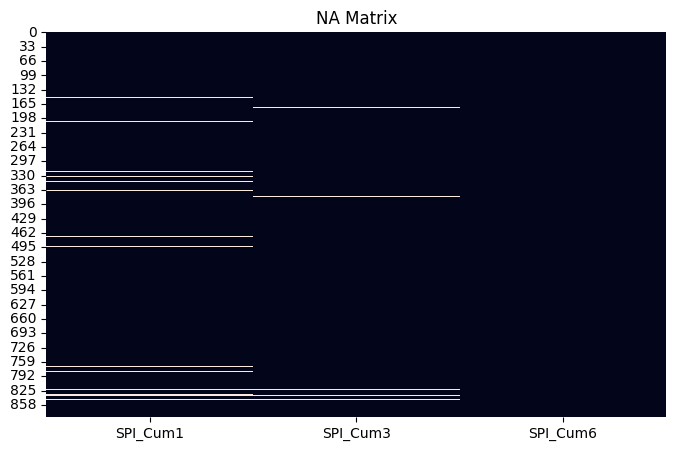

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(data_merge[["SPI_Cum1","SPI_Cum3","SPI_Cum6"]].isna(), cbar=False)
plt.title("NA Matrix")
plt.show()


In [11]:
data_merge.groupby("State")[["SPI_Cum1","SPI_Cum3","SPI_Cum6","inadequate"]].describe()

SPI_Cum1                                                    \
               count      mean       std       min       25%       50%   
State                                                                    
Abia            32.0 -0.788219  0.996548 -2.470000 -1.796500 -0.678000   
Abuja           32.0 -0.339242  1.163253 -3.018250 -0.957688 -0.236250   
Adamawa         32.0 -0.001953  0.931218 -1.376000 -0.682750 -0.052500   
Akwa Ibom       32.0 -0.572263  0.862940 -2.874000 -1.140688 -0.502125   
Bauchi          27.0 -0.461673  1.665328 -5.660667 -1.261667  0.039333   
Benue           32.0 -0.459417  0.719964 -1.823000 -0.862417 -0.381667   
Borno           26.0  0.425263  0.943366 -1.142000 -0.308321  0.219143   
Cross River     32.0 -0.601016  0.757042 -1.834000 -1.207750 -0.412750   
Edo             32.0 -0.764625  1.114635 -3.604500 -1.560750 -0.782750   
Enugu           32.0 -0.807312  1.149993 -3.781000 -1.580000 -0.706500   
Gombe           26.0 -0.463308  1.817178 -7.483000 -0.746500 -0.385000   
Jigawa          27.0  0.417574  1.352815 -1.806000 -0.327583  0.458667   
Kaduna          32.0 -0.288914  1.040954 -3.130250 -0.657375 -0.365625   
Kano            32.0  0.416328  1.676193 -3.361500 -0.350125  0.150500   
Katsina         27.0  0.581278  1.038275 -2.641500  0.087750  0.284500   
Kebbi           29.0  0.329592  1.022633 -1.262000 -0.228333  0.105667   
Kogi            32.0 -0.445010  1.010565 -2.465333 -0.962750 -0.496000   
Kwara           32.0  0.157641  1.030556 -2.164000 -0.532375  0.196500   
Lagos           32.0  0.116219  0.879151 -1.773000 -0.436500  0.244500   
Nassarawa       23.0 -0.173457  0.781930 -1.171500 -0.693500 -0.269500   
Niger           32.0  0.074909  1.009982 -2.047143 -0.621536  0.051686   
Ogun            32.0 -0.254031  0.961274 -2.038000 -0.934000 -0.215500   
Plateau         32.0 -0.548193  1.396193 -6.503500 -0.565333 -0.346833   
Rivers          32.0 -0.809102  1.197872 -3.100500 -1.582562 -0.853125   
Sokoto          30.0  0.284717  0.676931 -0.703250 -0.274250  0.269500   
Taraba          32.0 -0.195753  1.030641 -3.108500 -0.614450 -0.039100   
Yobe            22.0  0.190205  0.871560 -2.145000 -0.322250  0.175750   
Zamfara         30.0  0.501367  1.037717 -1.111000 -0.129750  0.349000   

                                SPI_Cum3            ...  SPI_Cum6            \
                  75%       max    count      mean  ...       75%       max   
State                                               ...                       
Abia        -0.268500  1.661000     32.0 -1.317844  ... -0.879500  1.226000   
Abuja        0.171938  2.134250     32.0 -0.699281  ...  0.474813  1.804500   
Adamawa      0.661875  2.137000     32.0  0.003453  ...  0.087750  1.425500   
Akwa Ibom   -0.107062  1.334250     32.0 -1.011656  ... -0.729062  0.992500   
Bauchi       0.664833  1.323333     32.0 -0.573687  ... -0.079250  1.180667   
Benue       -0.099667  1.723333     31.0 -0.987602  ... -0.965583  0.782333   
Borno        1.335107  1.847000     32.0  0.518660  ...  1.431929  2.235000   
Cross River -0.086500  1.353500     32.0 -1.148078  ... -1.053750  0.286500   
Edo         -0.129250  2.023500     32.0 -1.170031  ... -0.615375  0.925000   
Enugu       -0.050000  1.754000     32.0 -1.270500  ... -0.590000  1.299000   
Gombe        0.282500  2.355000     32.0 -0.492344  ... -0.336500  1.082000   
Jigawa       0.869500  4.747500     31.0  0.614597  ...  1.387167  2.260000   
Kaduna       0.139500  2.115750     32.0 -0.600133  ... -0.200813  1.427250   
Kano         0.584875  7.208000     32.0  0.383062  ...  1.003250  1.716000   
Katsina      0.967250  2.973000     32.0  0.737656  ...  1.368500  2.632500   
Kebbi        0.657667  4.375000     32.0  0.203286  ...  0.873333  1.919000   
Kogi         0.004250  2.000000     32.0 -0.795010  ... -0.401417  1.965333   
Kwara        0.779375  2.466000     32.0  0.200750  ...  1.282250  2.337500   
Lagos        0.664500  1.867000     32.0  0.094000  ...  0

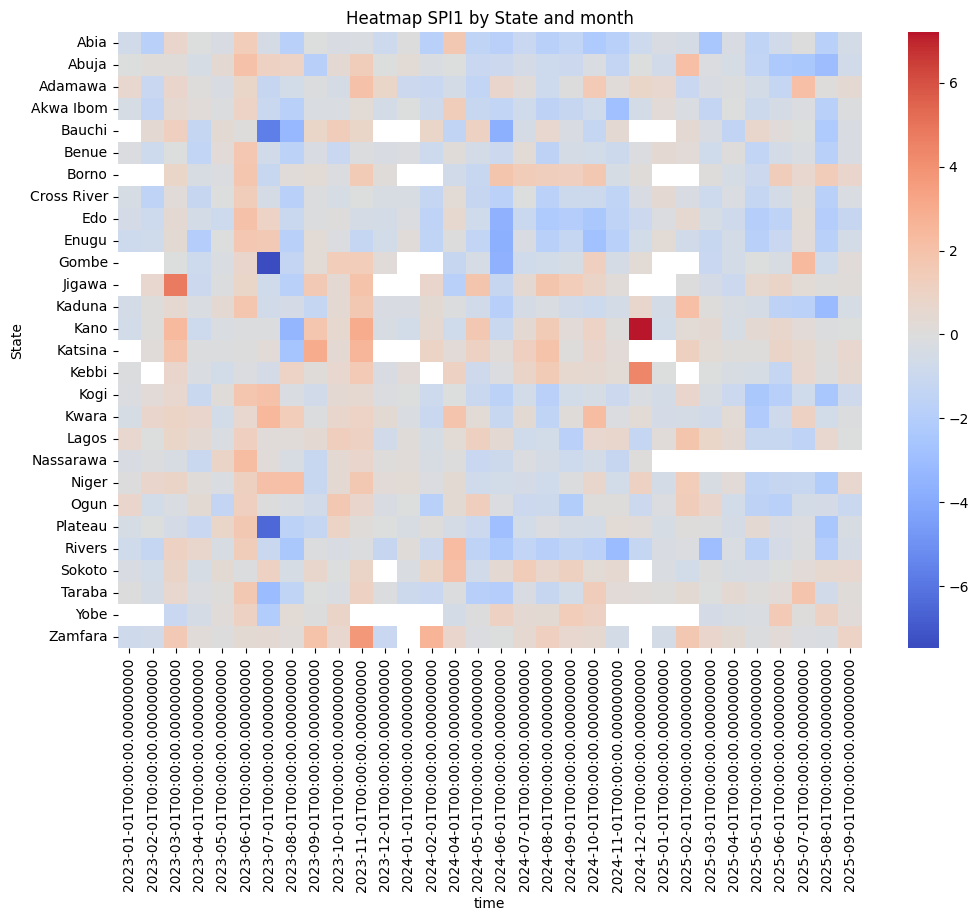

In [9]:
pivot = data_merge.pivot_table(values="SPI_Cum1", index="State", columns="time")

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="coolwarm", center=0)
plt.title("Heatmap SPI1 by State and month")
plt.show()

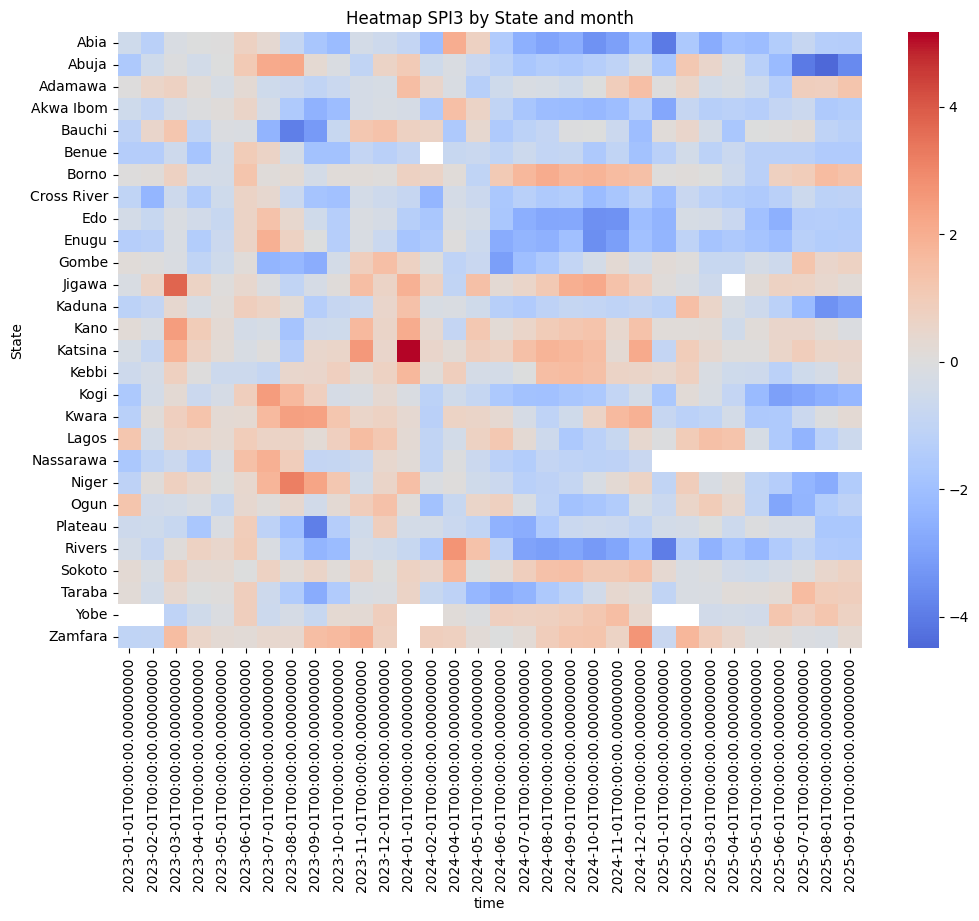

In [24]:
pivot = data_merge.pivot_table(values="SPI_Cum3", index="State", columns="time")

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="coolwarm", center=0)
plt.title("Heatmap SPI3 by State and month")
plt.show()

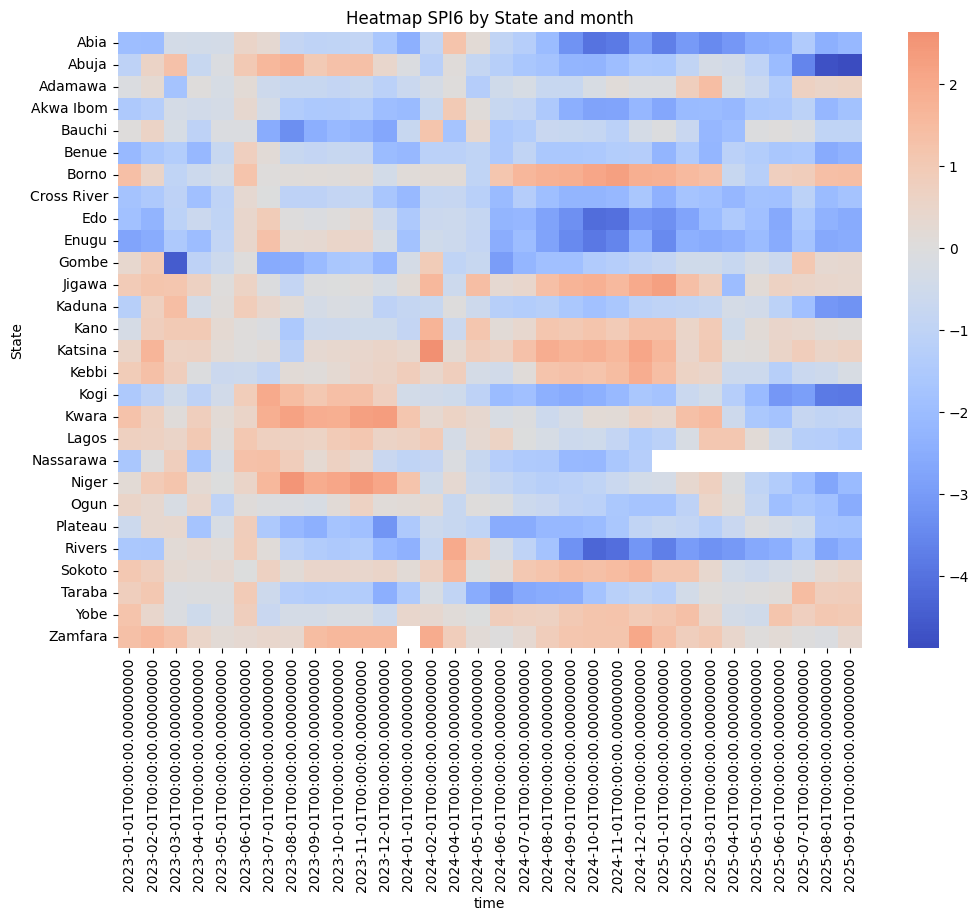

In [10]:
pivot = data_merge.pivot_table(values="SPI_Cum6", index="State", columns="time")

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="coolwarm", center=0)
plt.title("Heatmap SPI6 by State and month")
plt.show()